In [1]:
2%matplotlib inline

In [2]:
import numpy as np
from fuel.datasets.hdf5 import H5PYDataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
BATH_SIZE = 1
IMG_SIZE = 256

# Img resizing stuff
LR_HR_RATIO = 4
BIG_SIZE = int(IMG_SIZE * 76 / 64)
SMALL_SIZE = int(BIG_SIZE / LR_HR_RATIO)

DATA_TEMPLATE = '/data/fashion/extract_sample_3_%i_%i.h5'

In [4]:
data_set = H5PYDataset(DATA_TEMPLATE % (IMG_SIZE, IMG_SIZE), which_sets=('all',))

In [5]:
print(data_set.num_examples)

186759


In [6]:
handle = data_set.open()
text, img, metadata  = data_set.get_data(handle, slice(0, BATH_SIZE))

In [7]:
# to change from (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS ) to an actual image
img = img.reshape(IMG_SIZE, IMG_SIZE, 3)

In [8]:
def clean_plot(img):
    plt.imshow(img); plt.xticks([]); plt.yticks([]); plt.show()

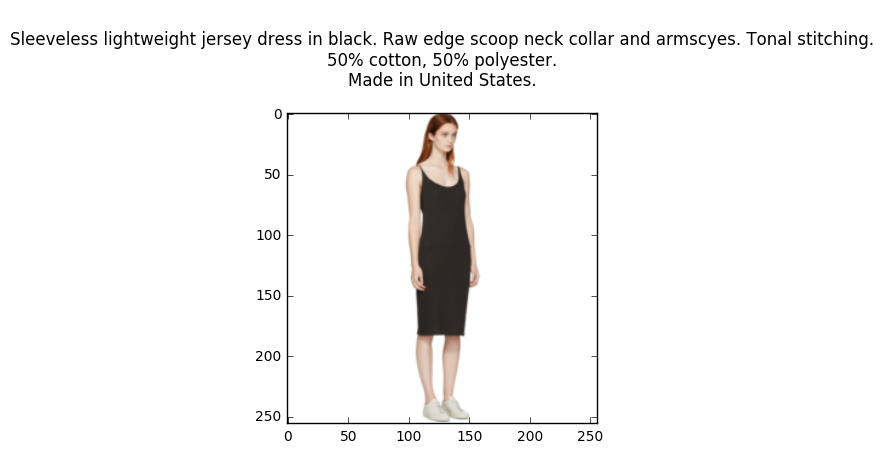

In [9]:
plt.imshow(img);
plt.title(text[0][0][0]);
plt.show()

## To be consistent with StackGAN

In [10]:
import scipy.misc

In [31]:
def clean_plot(img, size, dpi=60):
    plt.figure().set_size_inches(float(size)/float(dpi),float(size)/float(dpi))
    plt.xticks([]); plt.yticks([]);
    plt.imshow(img);

In [32]:
img_304 = scipy.misc.imresize(img, [BIG_SIZE, BIG_SIZE], 'bicubic')
img_76 = scipy.misc.imresize(img, [SMALL_SIZE, SMALL_SIZE], 'bicubic')

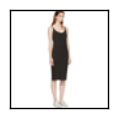

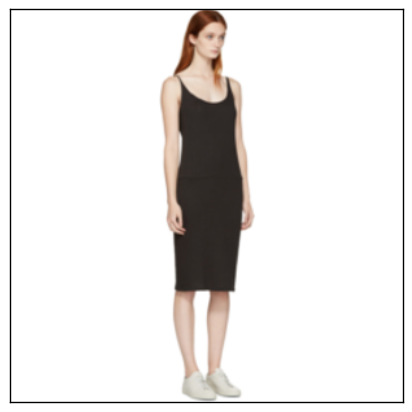

In [35]:
clean_plot(img_76, SMALL_SIZE) ; clean_plot(img_304, BIG_SIZE);